## 1. データを取り込んで特徴を確認

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame

In [0]:
data = pd.read_csv('http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3.csv')
data['pclass'] = data['pclass'].astype(str)    # pclassの型を文字列型に変換

In [3]:
data.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [4]:
data.describe()

,survived,age,sibsp,parch,fare,body
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [5]:
data[['age']].dropna().describe()

,age
count,1046.000000
mean,29.881138
std,14.413493
min,0.170000
25%,21.000000
50%,28.000000
75%,39.000000
max,80.000000


In [6]:
data[['fare']].dropna().describe()

,fare
count,1308.000000
mean,33.295479
std,51.758668
min,0.000000
25%,7.895800
50%,14.454200
75%,31.275000
max,512.329200


In [7]:
data[['body']].dropna().describe()

,body
count,121.000000
mean,160.809917
std,97.696922
min,1.000000
25%,72.000000
50%,155.000000
75%,256.000000
max,328.000000


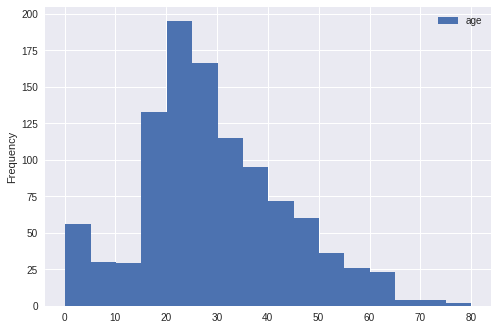

In [8]:
data[['age']].dropna().plot(kind='hist', bins=16)

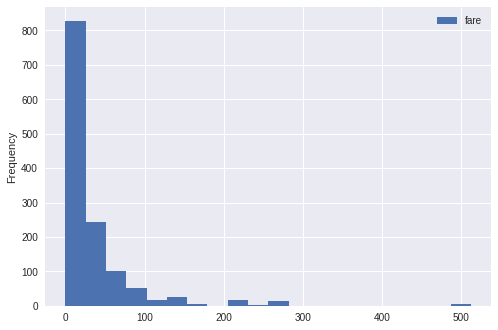

In [9]:
data[['fare']].dropna().plot(kind='hist', bins=20)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


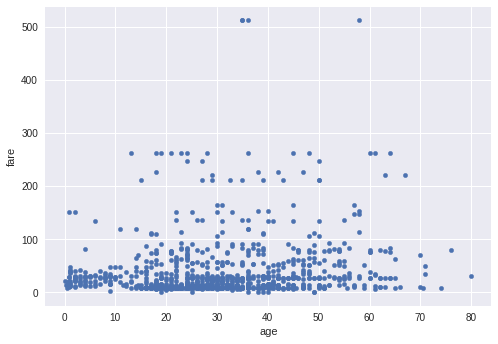

In [10]:
df = data[['age', 'fare']].dropna()
df.plot(kind='scatter', x='age', y='fare')

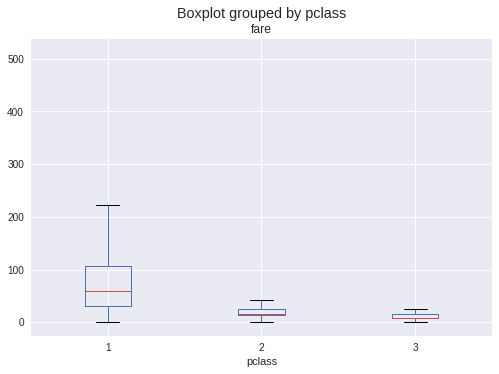

In [11]:
df = data[['fare', 'pclass']].dropna()
df.boxplot(column='fare', by='pclass')

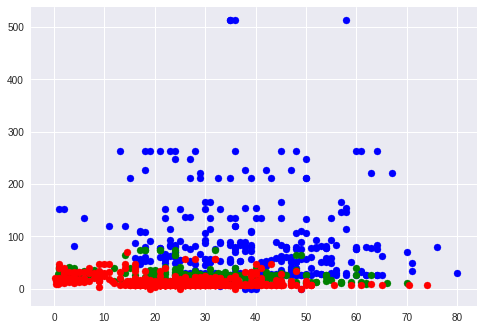

In [12]:
df1 = data[data.pclass=='1'][['age','fare']].dropna()
df2 = data[data.pclass=='2'][['age','fare']].dropna()
df3 = data[data.pclass=='3'][['age','fare']].dropna()
plt.scatter(df1.age, df1.fare, facecolor='blue')
plt.scatter(df2.age, df2.fare, facecolor='green')
plt.scatter(df3.age, df3.fare, facecolor='red')

In [13]:
df = data[['sex', 'survived']].dropna()
pd.crosstab(df.sex, df.survived)

survived,0,1
sex,,
female,127,339
male,682,161


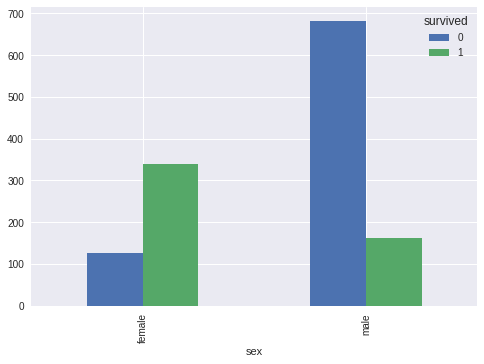

In [14]:
pd.crosstab(data.sex ,data.survived).plot(kind='bar')

In [15]:
df.mean()

survived    0.381971
dtype: float64

In [16]:
339.0/(127+339)

0.7274678111587983

In [17]:
df = data[['pclass', 'survived']].dropna()
pd.crosstab(df.pclass, df.survived)

survived,0,1
pclass,,
1,123,200
2,158,119
3,528,181


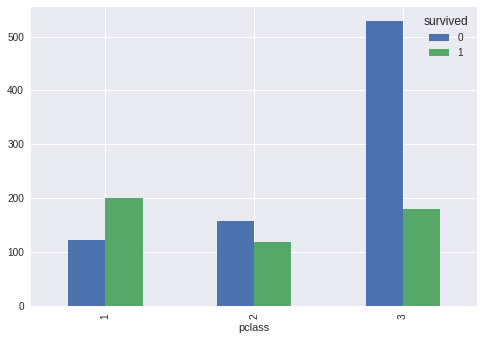

In [18]:
pd.crosstab(data.pclass ,data.survived).plot(kind='bar')

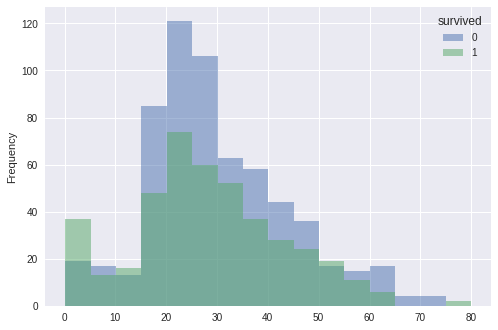

In [19]:
_, bins = np.histogram(data.age.dropna(), bins=20)
data.reset_index().pivot('index', 'survived', 'age').plot(kind='hist', bins=16, alpha=0.5)

## 2. 年齢と性別を特徴量としてロジスティック回帰を適用

In [0]:
from PIL import Image
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [21]:
tmp = data[['age', 'sex', 'survived']].dropna()
X_ = tmp[['age', 'sex']]
y = tmp['survived']
X_.head()

,age,sex
0,29.00,female
1,0.92,male
2,2.00,female
3,30.00,male
4,25.00,female


In [22]:
X = pd.get_dummies(X_)
X.head()

,age,sex_female,sex_male
0,29.00,1,0
1,0.92,0,1
2,2.00,1,0
3,30.00,0,1
4,25.00,1,0


In [23]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, random_state=1)
clf = LogisticRegression()
clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
y_val_pred = clf.predict(X_val)
print ('Accuracy on Training Set: {:.3f}'.format(accuracy_score(y_train, y_train_pred)))
print ('Accuracy on Validation Set: {:.3f}'.format(accuracy_score(y_val, y_val_pred)))

Accuracy on Training Set: 0.775
Accuracy on Validation Set: 0.795


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [24]:
clf = LogisticRegression()
scores = cross_val_score(clf, X, y, cv=5)

print ('Scores:', scores)
print ('Mean Score: {:f} ± {:.3}'.format(scores.mean(), scores.std()))

Scores: [0.84761905 0.83333333 0.78947368 0.74641148 0.67788462]
Mean Score: 0.778944 ± 0.0617


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

## 3. 年齢と性別を特徴量として決定木を適用

In [25]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, random_state=1)
clf = DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=2)
clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
y_val_pred = clf.predict(X_val)
print ('Accuracy on Training Set: {:.3f}'.format(accuracy_score(y_train, y_train_pred)))
print ('Accuracy on Validation Set: {:.3f}'.format(accuracy_score(y_val, y_val_pred)))

Accuracy on Training Set: 0.780
Accuracy on Validation Set: 0.810


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [26]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=2)
scores = cross_val_score(clf, X, y, cv=5)

print ('Scores:', scores)
print ('Mean Score: {:f} ± {:.3}'.format(scores.mean(), scores.std()))

Scores: [0.85714286 0.83809524 0.79425837 0.74641148 0.64423077]
Mean Score: 0.776028 ± 0.0762


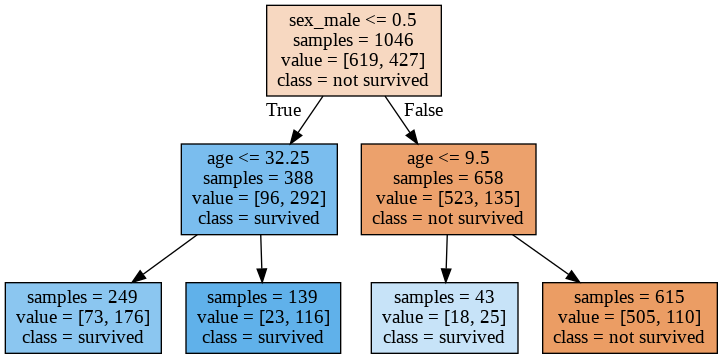

In [27]:
clf.fit(X, y)
export_graphviz(clf, out_file='tree.dot',
                feature_names=X.columns, 
                class_names=['not survived', 'survived'],
                impurity=False, filled=True)
!dot -Tpng tree.dot -o tree.png
Image.open("tree.png") 

## 4. 年齢、性別、社会的地位を特徴量として決定木を適用

In [28]:
tmp = data[['age', 'sex', 'pclass', 'survived']].dropna()
X_ = tmp[['age', 'sex', 'pclass']]
y = tmp['survived']
X_.head()

,age,sex,pclass
0,29.00,female,1
1,0.92,male,1
2,2.00,female,1
3,30.00,male,1
4,25.00,female,1


In [29]:
X = pd.get_dummies(X_)
X.head()

,age,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,29.00,1,0,1,0,0
1,0.92,0,1,1,0,0
2,2.00,1,0,1,0,0
3,30.00,0,1,1,0,0
4,25.00,1,0,1,0,0


In [30]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=2)
scores = cross_val_score(clf, X, y, cv=5)

print ('Scores:', scores)
print ('Mean Score: {:f} ± {:.3}'.format(scores.mean(), scores.std()))

Scores: [0.5047619  0.83809524 0.8277512  0.75598086 0.59134615]
Mean Score: 0.703587 ± 0.133


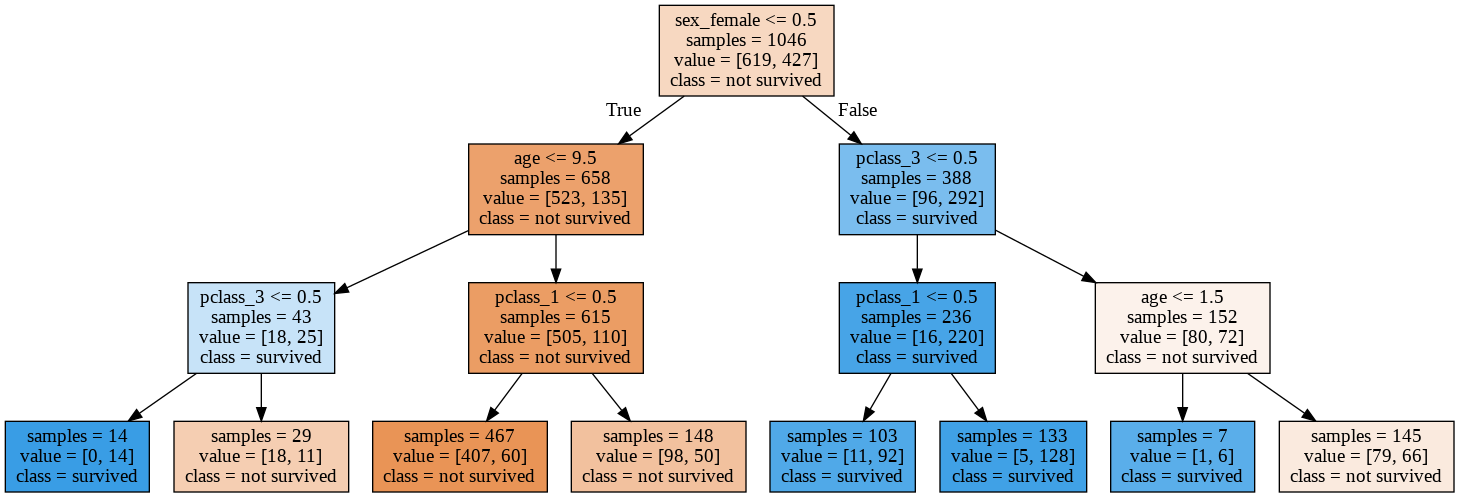

In [31]:
clf.fit(X, y)
export_graphviz(clf, out_file='tree.dot',
                feature_names=X.columns, 
                class_names=['not survived', 'survived'],
                impurity=False, filled=True)
!dot -Tpng tree.dot -o tree.png
Image.open("tree.png") 